**1.Read dataset**

In [ ]:
import pandas as pd
WA = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
WA

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**2. Data cleaning and EDA**

In [ ]:
WA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

In [ ]:
WA= WA.drop("customerID", axis=1)

In [ ]:
WA.columns = WA.columns.str.strip()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in WA.columns:
    if WA[col].dtype == 'object':
        le = LabelEncoder()
        WA[col] = le.fit_transform(WA[col].astype(str))
        encoders[col] = le


Methods to see relationship between features

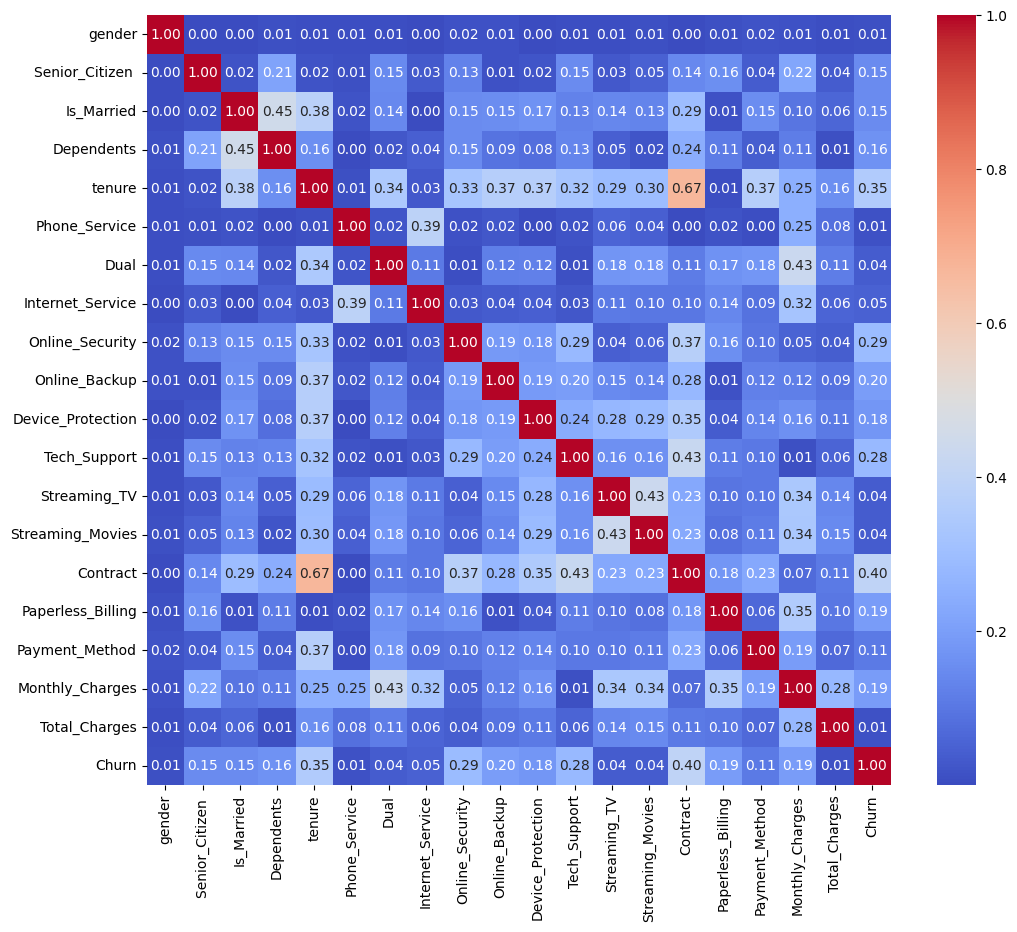

In [ ]:
correlation_matrix = WA.corr().abs()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

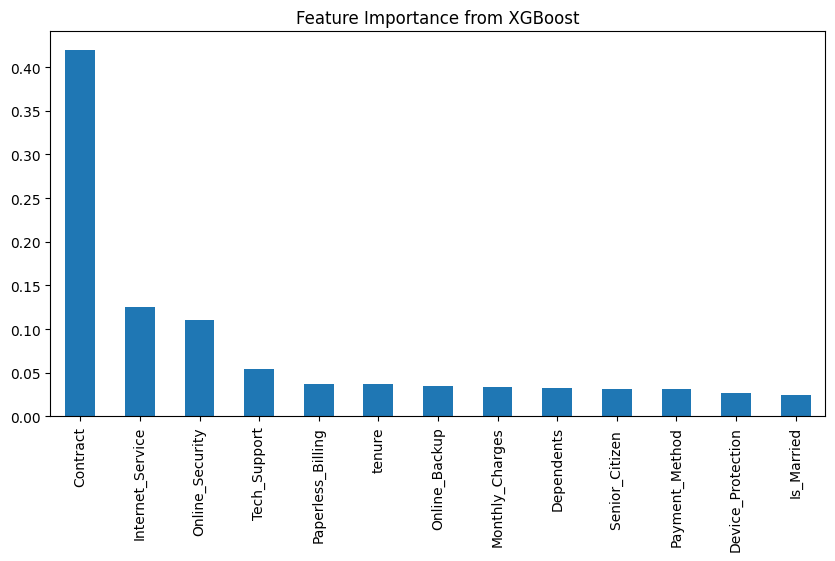

In [ ]:
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = WA.drop("Churn", axis=1)
y = WA["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance from XGBoost")
plt.show()
"""

In [ ]:
correlation_with_target = WA.corr(method='pearson')["Churn"].drop("Churn")
print("Correlation with Churn:\n", correlation_with_target)
threshold = 0.04
features_to_keep = correlation_with_target[abs(correlation_with_target) >= threshold].index
features_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
print("Features to DROP (< threshold):", list(features_to_drop))

Correlation with Churn:
 gender              -0.008612
Senior_Citizen       0.150889
Is_Married          -0.150448
Dependents          -0.164221
tenure              -0.352229
Phone_Service        0.011942
Dual                 0.038037
Internet_Service    -0.047291
Online_Security     -0.289309
Online_Backup       -0.195525
Device_Protection   -0.178134
Tech_Support        -0.282492
Streaming_TV        -0.036581
Streaming_Movies    -0.038492
Contract            -0.396713
Paperless_Billing    0.191825
Payment_Method       0.107062
Monthly_Charges      0.193356
Total_Charges        0.014479
Name: Churn, dtype: float64
Features to DROP (< threshold): ['gender', 'Phone_Service', 'Dual', 'Streaming_TV', 'Streaming_Movies', 'Total_Charges']


In [ ]:
WA = WA.drop(["gender", "Phone_Service", "Dual","Streaming_TV", "Streaming_Movies", "Total_Charges"],axis=1)

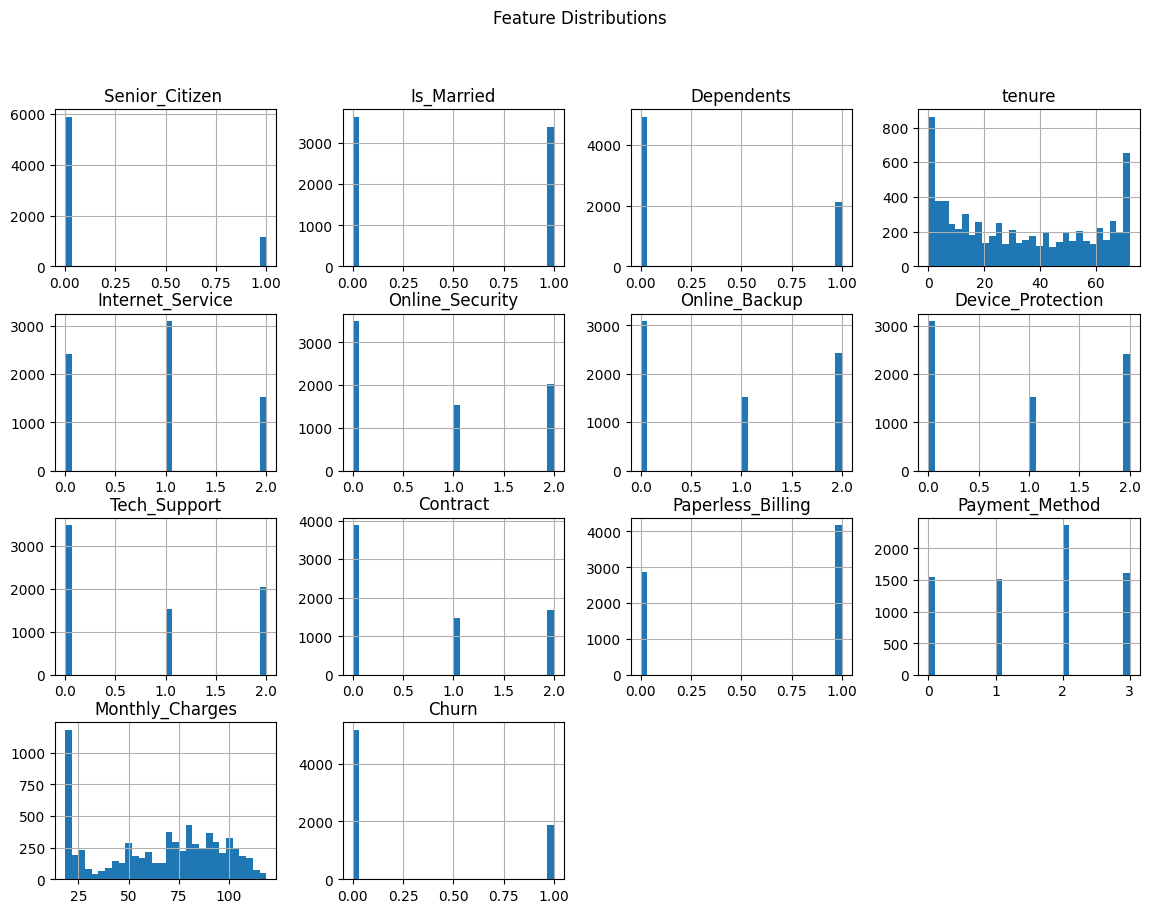

In [ ]:
import matplotlib.pyplot as plt
WA.hist(figsize=(14, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=12)
plt.show()

Detect if there is outliers

In [ ]:
"""
from scipy.stats import zscore
WA["z_score"] = zscore(WA["Monthly_Charges"])
outliers = WA[(WA["z_score"] > 3) | (WA["z_score"] < -3)]
print(f"Number of outliers: {len(outliers)}")
"""

Number of outliers: 0


In [ ]:
print(WA['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = WA.drop("Churn", axis=1)
y = WA["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**3.SVC model with upsampling**



Accuracy: 0.7342995169082126

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1021
           1       0.73      0.76      0.74      1049

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070



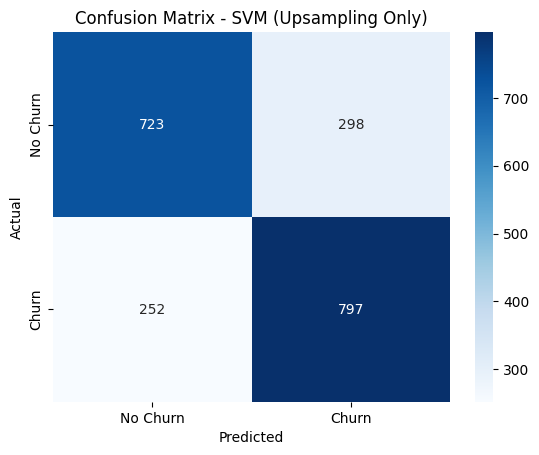

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Upsampling Only)")
plt.show()


**4.naive_bayes**

Accuracy: 0.7454106280193237

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1021
           1       0.73      0.79      0.76      1049

    accuracy                           0.75      2070
   macro avg       0.75      0.74      0.74      2070
weighted avg       0.75      0.75      0.74      2070



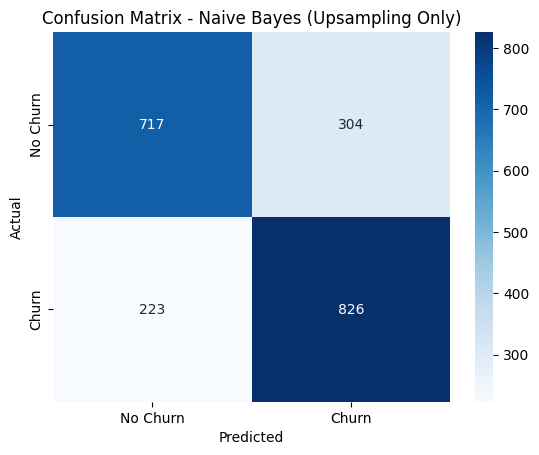

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Upsampling Only)")
plt.show()

**5.Logistic Regression model**

In [ ]:
X = WA.drop("Churn", axis=1)
y = WA["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8197303051809794

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



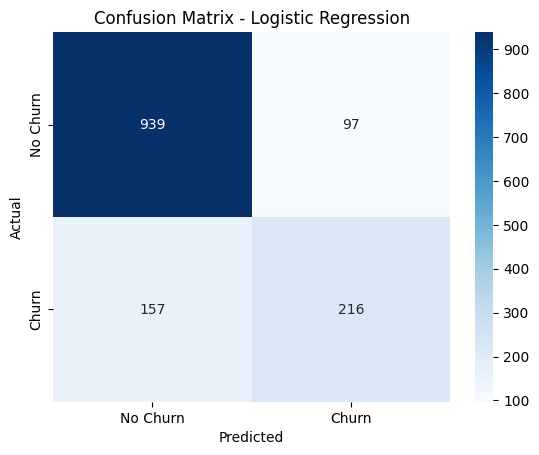

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Test ROC AUC: 0.8582543190452037


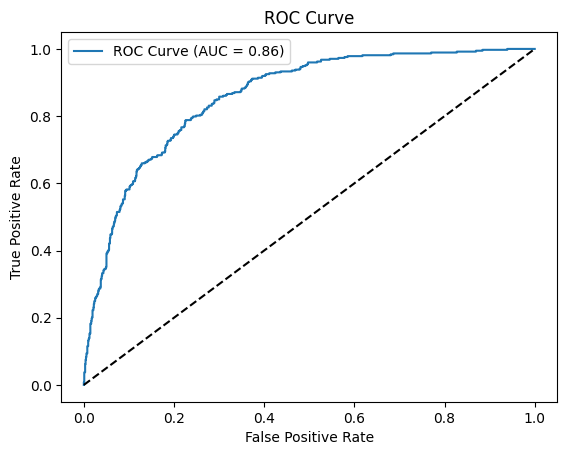

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("Test ROC AUC:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

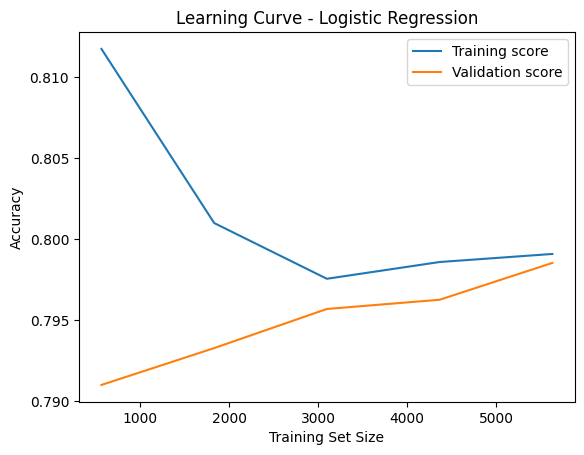

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve - Logistic Regression")
plt.show()

Logistic regression using Class Weights

Accuracy: 0.7459190915542938

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



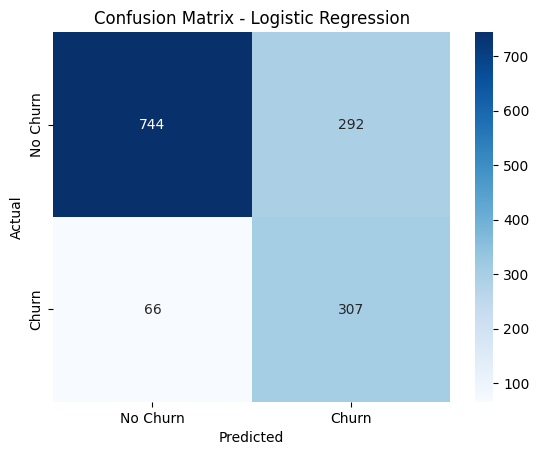

In [ ]:
model_weight = LogisticRegression(max_iter=1000,class_weight='balanced')
model_weight.fit(X_train, y_train)
y_pred = model_weight.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Test ROC AUC: 0.8582543190452037


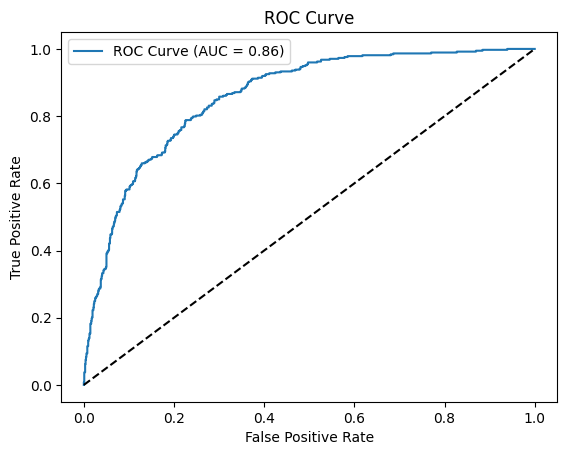

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("Test ROC AUC:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

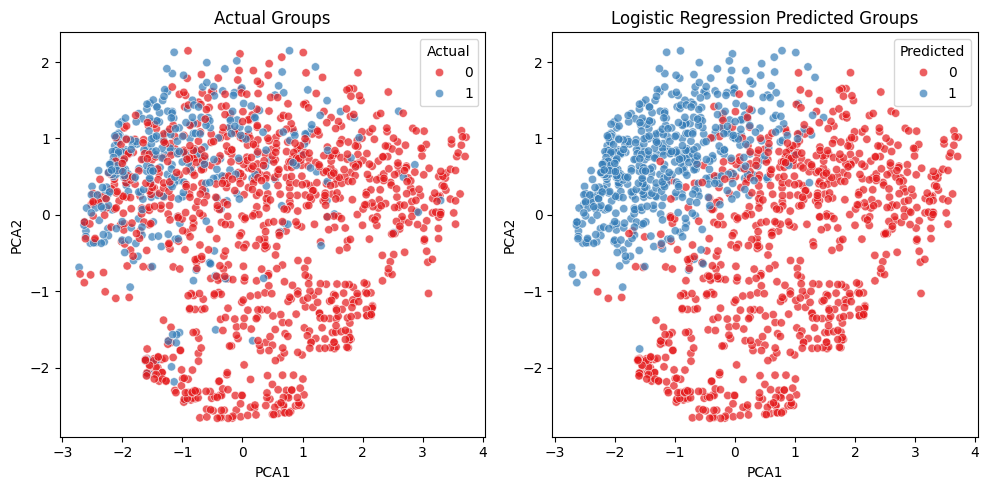

In [ ]:
from sklearn.decomposition import PCA
y_pred_log = model_weight.predict(X_test)
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)
df_plot = pd.DataFrame({
    'PCA1': X_test_2d[:, 0],
    'PCA2': X_test_2d[:, 1],
    'Actual': y_test.values,
    'Predicted': y_pred
})
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Actual', palette='Set1', alpha=0.7)
plt.title("Actual Groups")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Predicted', palette='Set1', alpha=0.7)
plt.title("Logistic Regression Predicted Groups")

plt.tight_layout()
plt.show()


Logistic regression with upsampling


Accuracy: 0.7541062801932367

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      1021
           1       0.74      0.79      0.77      1049

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



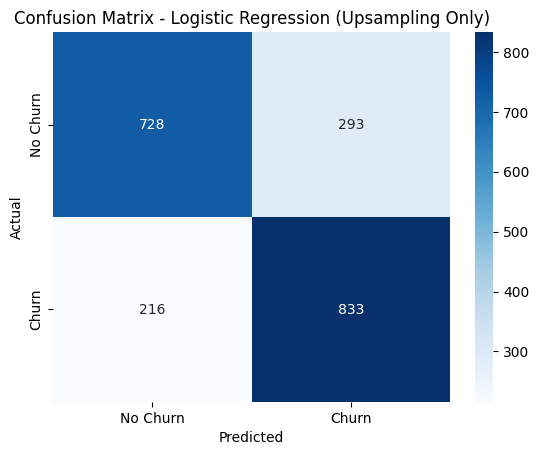

In [ ]:
!pip install joblib
from sklearn.utils import resample
from google.colab import files
majority_class = WA[WA.Churn == 0]
minority_class = WA[WA.Churn == 1]
minority_upsampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),
    random_state=42
)

df_upsampled = pd.concat([majority_class, minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
X_balanced = df_upsampled.drop("Churn", axis=1)
y_balanced = df_upsampled["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

feature_order = X_balanced.columns.tolist()
joblib.dump((log_reg, encoders, feature_order), "log_reg_with_encoders.pkl")
files.download("log_reg_with_encoders.pkl")

y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Upsampling Only)")
plt.show()


In [ ]:
print (feature_order)

['Senior_Citizen ', 'Is_Married', 'Dependents', 'tenure', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges']
